### Q3. Creating a decision tree from scratch using the CART algorithm for regression and classification tasks.`

---
> In this algorithm, the dataset has not been divided. An algorithm without using any data distribution. 

---







In [0]:
### Import all the needful libraries 

from csv import reader
from random import seed
from random import randrange 

### Load the csv file

def loading_csv_file(path):
    f=open(path,'rt')
    dataset=reader(f)
    dataset=list(dataset)
    return dataset

### Matric to find out the model's accuracy

def accuracy_metric(actual, predicted): 
    True_P = 0 
    for j in range(len(actual)):
        if actual[j] == predicted[j]:
            True_P += 1
    return True_P / float(len(actual)) * 100.0

### Create a terminal node for value
def Terminal_node(grp):
	outcomes = [row[-1] for row in grp]
	return max(set(outcomes), key=outcomes.count)

### Algorithm to evaluate the decision tree

def algorithm(dataset, decisiontree, n_folds, *args):
    #split the data in k folds
    data = dataset
    n_f = n_folds
    s_dataset = list()  
    c_dataset = list(data) 
    fold_size = int(len(data) / n_f)  #size of each fold 
    for i in range(0,n_f):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(c_dataset))
            fold.append(c_dataset.pop(index))
        s_dataset.append(fold)
        folds = s_dataset
    
    scores = list()   
    for fold in folds:
        trainset_data = list(folds)
        trainset_data.remove(fold)  
        trainset_data = sum(trainset_data, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = decisiontree(trainset_data, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

### Split the dataset based on an attribute either in the right or left. 

def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

### Choose the root based on the Gini index

def gini_index(grps, classes):
	no_instances = float(sum([len(grp) for grp in grps]))
	gini_val = 0.0
	for grp in grps:
		size = float(len(grp))
		if size == 0:
			continue
		score = 0.0
		for class_val in classes:
			p = [row[-1] for row in grp].count(class_val) / size
			score += p * p
		gini_val += (1.0 - score) * (size / no_instances)
	return gini_val

### Build a decision tree which uses depth and leaf minimum size.

def build_tree(train, max_depth, Leaf_min_size):
	root_node = get_split(train)
	Child_split(root_node, max_depth, Leaf_min_size, 1)
	return root_node

### Predict something using decision tree

def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']


### select the best split point for the dataset using gini index.

def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_grps = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			grps = test_split(index, row[index], dataset)
			gini = gini_index(grps, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_grps = index, row[index], gini, grps
	return {'index':b_index, 'value':b_value, 'grps':b_grps}

### Create child splits for a node 

def Child_split(node, max_depth, Leaf_min_size, depth):
	left, right = node['grps']
	del(node['grps'])
	if not left or not right:
		node['left'] = node['right'] = Terminal_node(left + right)
		return
	if len(left) <= Leaf_min_size:
		node['left'] = Terminal_node(left)
	else:
		node['left'] = get_split(left)
		Child_split(node['left'], max_depth, Leaf_min_size, depth+1)
	if depth >= max_depth:
		node['left'], node['right'] = Terminal_node(left), Terminal_node(right)
		return
	if len(right) <= Leaf_min_size:
		node['right'] = Terminal_node(right)
	else:
		node['right'] = get_split(right)
		Child_split(node['right'], max_depth, Leaf_min_size, depth+1)


### CART Algorithm

def making_decisiontree(train_data, test_data, max_depth, Leaf_min_size):
	tree = build_tree(train_data, max_depth, Leaf_min_size)
	predictions = list()
	for row in test_data:
		prediction = predict(tree, row)
		predictions.append(prediction)
	return(predictions)

####  MAIN FUNCTIONALITY ###

filename = 'data/iris.csv'
dataset = loading_csv_file(filename)

number_of_folds =3
max_depth_tree = 5
leaf_min_size = 3
print("                      ALGORITHM FOR WHOLE DATASET           ")
print("THE SIZE OF DATASET :",len(dataset))
print("NUMBER OF FOLDS :",number_of_folds)
print("MAXIMUM DEPTH OF THE TREE :",max_depth_tree)
print("MINIMUM SIZE OF LEAF NODE :",leaf_min_size)

scores = algorithm(dataset, making_decisiontree, number_of_folds, max_depth_tree, leaf_min_size)
print('Scores in Array: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))



                      ALGORITHM FOR WHOLE DATASET           
 
THE SIZE OF DATASET : 151
NUMBER OF FOLDS : 3
MAXIMUM DEPTH OF THE TREE : 5
MINIMUM SIZE OF LEAF NODE : 3
Scores in Array: [96.0, 98.0, 96.0]
Mean Accuracy: 96.667%


### *Split the dataset into two parts:  70% of data for training and 30% of data for testing.*

In [0]:

### Algorithm for spliting the data into 70 and 30 %.

def algorithm_for_data_split(dataset, decisiontree, n_folds, *args):
        #split the data in k folds
        data = dataset
        n_f = n_folds
        s_dataset = list()  
        c_dataset = list(data) 
        Train_data = int(len(data)*70 /100)  # Data for training the dataset
        Test_data =  int(len(data)*30 /100)  # Data for testing the dataset
        fold = list()
        while len(fold) < Train_data:
            index = randrange(len(c_dataset))
            fold.append(c_dataset.pop(index))
        s_dataset.append(fold)
        
        fold = list()
        while len(fold)<Test_data :
            index = randrange(len(c_dataset))
            fold.append(c_dataset.pop(index))
        s_dataset.append(fold)
        folds = s_dataset
        scores=list()
        train_set = s_dataset[0] 
        test_set= s_dataset[1]
        print('The size of training data :',len(train_set))
        print('The size of Test data :',len(test_set))
        predicted = decisiontree(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
        return scores

####  MAIN FUNCTIONALITY 

filename = 'data/iris.csv'
dataset = loading_csv_file(filename)

number_of_folds =3
max_depth_tree = 5
leaf_min_size = 3

print("          ALGORITHM FOR TRAINING AND TESTING (70% TRANING DATA AND 30% TESTING DATA )           ")
print(" ")
print("THE SIZE OF DATASET :",len(dataset))
print("MAXIMUM DEPTH OF THE TREE :",max_depth_tree)
scores = algorithm_for_data_split(dataset, making_decisiontree, number_of_folds, max_depth_tree, leaf_min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))



          ALGORITHM FOR TRAINING AND TESTING (70% TRANING DATA AND 30% TESTING DATA )           
 
THE SIZE OF DATASET : 151
MAXIMUM DEPTH OF THE TREE : 5
The size of training data : 105
The size of Test data : 45
Scores: [93.33333333333333]
Mean Accuracy: 93.333%


### Using 5 fold cross-validation on the dataset. Finding the optimum depth of the tree.

In [0]:
number_of_folds=5
max_depth_tree
max_score=0
leaf_min_size=3
for i in range(1,50):
    depth_tree=i
    score = algorithm(dataset, making_decisiontree, number_of_folds,depth_tree, leaf_min_size)
    mean_accuracy=(sum(score)/float(len(score)))
    if max_score<mean_accuracy:
        max_score=mean_accuracy
        max_depth_tree=depth_tree
        
print("MAXIMUM ACCURACY : ",max_score)
print("OPTIMAL DEPTH OF THE TREE : ",max_depth_tree)
        
    

MAXIMUM ACCURACY :  98.0
OPTIMAL DEPTH OF THE TREE :  7


In [0]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree for regression
from sklearn.metrics import mean_squared_error
decision_tree = DecisionTreeRegressor(max_depth=2)
from sklearn.model_selection import train_test_split
dataset1 = pd.read_csv('data/Real_estate_valuation_data_set.csv')
x = dataset1.drop("Y house price of unit area" ,axis=1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,dataset1['Y house price of unit area'] , test_size=0.3)
decision_tree.fit(x_train1,y_train1)
pred= decision_tree.predict(x_test1)
#print(prediction)
accuracy = mean_squared_error(y_test1, pred,  sample_weight=None)
print "Mean Squared Error:",accuracy

Mean Squared Error: 68.6835135204


For Real_estate_valuation_data_set the Decision Tree is:

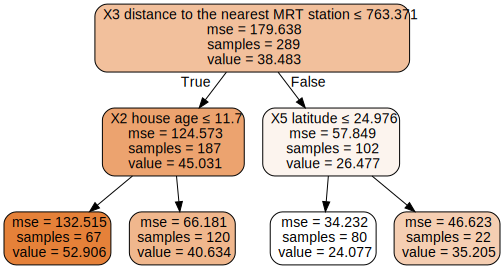

In [0]:
import graphviz

dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("real data")
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                      feature_names=list(x_train1),  
                      class_names=list(y_train1),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### For iris dataset the learned decision tree is :

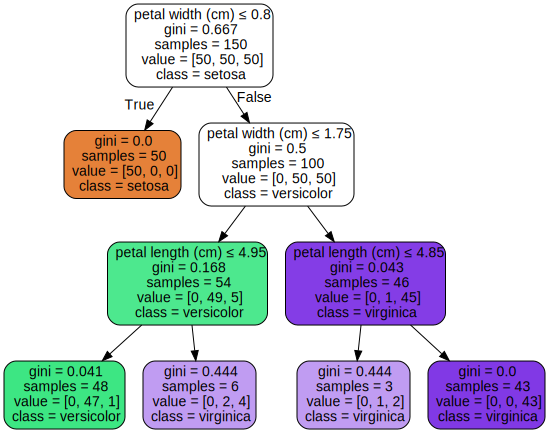

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

>>> We can see that the root node which has the highest Gini index value after that tree follows the node which has next highest value and like this way it is creating a tree.  

#### For the IRIS dataset classification problem, consider three variants of the decision tree algorithm. In the best case, we do an exhaustive search over all possible tree orders and choose the one which gives us the best accuracy on the train set. We use this model to predict for the test set. The second variant that we build gives us the worst performing model from the exhaustive enumeration. Compare the performance of the best order with the greedy order and with worst order.

In [0]:

def loading_csv_file(path):
    f=open(path,'rt')
    dataset=reader(f)
    dataset=list(dataset)
    return dataset

def data_manp(data):
        s_dataset =list()
        c_dataset = list(data) 
        Train_data = int(len(data)*70 /100)  # Data for training the dataset
        Test_data =  int(len(data)*30 /100)  # Data for testing the dataset
        fold = list()
        while len(fold) < Train_data:
            index = randrange(len(c_dataset))
            fold.append(c_dataset.pop(index))
        s_dataset.append(fold)
        
        fold = list()
        while len(fold)<Test_data :
            index = randrange(len(c_dataset))
            fold.append(c_dataset.pop(index))
        s_dataset.append(fold)
        folds = s_dataset
        scores=list()
        train_set = s_dataset[0] 
        test_set= s_dataset[1]
        return train_set,test_set 

###find the training error in the 70% data for iris dataset

def algorithm_training_for_data(dataset, algorithm, n_folds, *args):   
        train_set = list(dataset)  
        test_set = list(dataset)
        predicted = algorithm(train_set, train_set, *args)
        actual = [row[-1] for row in train_set]
        accuracy = accuracy_metric(actual, predicted)
        return accuracy
    
### CART Algorithm

def making_decisiontree(train_data, test_data, max_depth, Leaf_min_size):
	tree = build_tree(train_data, max_depth, Leaf_min_size)
	predictions = list()
	for row in test_data:
		prediction = predict(tree, row)
		predictions.append(prediction)
	return(predictions)
    
    
max_acc = 0
min_acc = 100
avg_acc=.5
depth=4
worst_depth = 0
n_folds=3
min_size=5
filename = 'data/iris.csv'    
data = loading_csv_file(filename)
train_data,test_data=data_manp(data)
for i in range(2,100):
        max_depth = i
        scores = algorithm_training_for_data(train_data, making_decisiontree, n_folds, max_depth, min_size)
        if(max_acc < scores):
            max_acc = scores
            optimal_depth = max_depth
        if(min_acc >scores):
            min_acc = scores
            worst_depth = max_depth
            
print( "      BEST, WORST AND GREEDY  ACCURACY AND OPTIMAL DEPTHS ACCORDING TO TRAINING DATASET                   ")
print (" ")
print( "            MAX ACCURACY:",max_acc,"          OPTIMAL DEPTH:",optimal_depth)
print ("")
print ("            MIN ACCURACY:",min_acc,"          WORST DEPTH:",worst_depth)
print ("")
print ("            GREEDY ACCURACY:",min_acc+avg_acc,"          GREEDY DEPTH:",depth)

      BEST, WORST AND GREEDY  ACCURACY AND OPTIMAL DEPTHS ACCORDING TO TRAINING DATASET                   
 
            MAX ACCURACY: 100.0           OPTIMAL DEPTH: 3

            MIN ACCURACY: 99.0476190476           WORST DEPTH: 2

            GREEDY ACCURACY: 99.5476190476           GREEDY DEPTH: 4


>>> We can see the performance of the approach in the above output.

**REFERENCES**:

[1]. https://machinelearningmastery.com/machine-learning-with-python/2019MachineLearningMastery

[2]. http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/

[3]. https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

[4]. https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

[5]. https://scikit-learn.org/stable/modules/tree.html